# 第29讲 寻找事物演化规律(数据拟合)及超越代数方程求解

## 数据拟合——寻找隐藏在数据中的事物演化规律

### 数据拟合编程步骤：
1. 导入scipy.optimize,matplotlib.pyplot,numpy模块
2. 准备待拟合数据（自变量数组xs，函数值数组ys）
3. 画出待拟合数据折线图，观察数据变化趋势，帮助确定拟合数据对应的数学模型
4. 依据猜测的数学模型定义带待定参数的拟合函数def f(x,a,b,c,...): return ...
5. 调用曲线拟合函数  **p,pcov=optimize.curve_fit(f,ts,ys,parameter)**
6. 对自变量采样区间重新采样  xsn=np.linspace(xs0,xsn,m)
7. 重新计算函数采样，ysn=f(xsn,p[0],p[1],p2],...)
8. 用新采样数组(xsn,ysn)画拟合函数曲线及原始数据点，直观观察拟合的吻合度
9. 计算拟合函数在原自变量采样位置的函数值，并计算误差，判断拟合的拟合度

### 曲线拟合示例——温度数据的曲线拟合

下面是从1月开始阿拉斯加每个月的温度极值（摄氏度）：

温度最大值Th: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18

温度最小值Tl: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

寻找高温Th和Tl随时间演化的规律，均采用**高斯模型**，所需程序temp.py内容如下

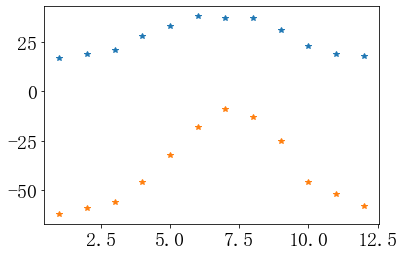

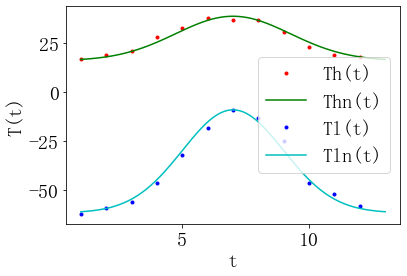

u= [16.10064612 22.7121506   0.09743624] 
d= [-61.45879741  52.54281341   0.12603812]
error1= 0.12144093787491596
error2= 0.08909490765785442


In [20]:
#encoding=gb2312
from scipy import optimize as opt
from matplotlib import pyplot as pt
import numpy as np

na=np.array;
opcf=opt.curve_fit

Th=na([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
Tl=na([62, 59, 56, 46, 32, 18, 9, 13, 25, 46, 52, 58])*(-1)
t=np.arange(Lh)+1
pt.figure(1)
pt.plot(t,Th,'*')
pt.plot(t,Tl,'*')
Lh=len(Th);
pt.figure(2)

def f(x,a,b,c):
    return a+b*np.exp(-c*(x-7)**2)

param1=[16,23,0.1]  #给定初始值
u,ucov=opcf(f,t,Th,param1)

param2=[-61,53,0.13]
d,dcov=opcf(f,t,Tl,param2)

t2=np.linspace(1,Lh+1,200,endpoint=True)

Thn=f(t2,u[0],u[1],u[2]);
Tln=f(t2,d[0],d[1],d[2])

pt.rcParams['font.size']=20
pt.rcParams['font.sans-serif']=['SimSun']
pt.rcParams['axes.unicode_minus']=False

pt.plot(t,Th,'r.',t2,Thn,'g-',t,Tl,'b.',t2,Tln,'c-')

pt.legend(['Th(t)','Thn(t)','Tl(t)','Tln(t)'])
pt.xlabel('t');
pt.ylabel('T(t)');
pt.show()

print('u=',u,'\nd=',d)

err1=(f(t,u[0],u[1],u[2])-Th)/(Th.max()-Th.min())
err2=(f(t,d[0],d[1],d[2])-Tl)/(Tl.max()-Tl.min())
er1=np.abs(err1).max();
print('error1=',er1)
er2=np.abs(err2).max();
print('error2=',er2)

## 求解超越代数方程

不仅线性方程组和高次代数方程求解是科学研究必须面对的基本问题。同样超越代数方程求解也是科学研究的必须面对的重要问题。  

编程求解超越代数方程的方法步骤是：

1.  导入 matplotlib的子包pyplot(自动导入numpy)和scipy的子包optimize
2.  定义描述超越代数方程的函数f(x)
3.  对自变量和函数在关注的区间上采样画图，看曲线估计根的初值x0
4.  调用 x_sol=scipy.optimize.fsolve(f,x0)求根
5.  计算函数在x_sol处的函数值，检查函数值是否非常接近0
6.  输出求解结果到屏幕
7.  在函数曲线上直观标记根的位置

超越代数方程求解(即求根或寻找零点),以例子展示方法步骤

对于函数

f(x)=0.5*(x**2-1)+10*sin(x),

求f(x)=0的自变量取值，程序findroot.py内容如下：

x_sol= [-2.79425714  0.04989622  3.97428997  4.55579765] 
f(x_sol)= [-6.44906351e-12  1.72084569e-15 -8.68549677e-12  2.58193467e-11]


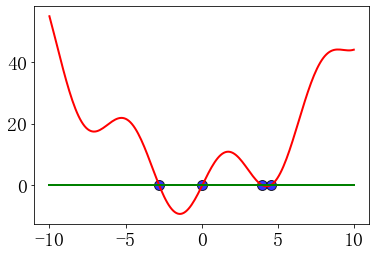

In [21]:
#encoding=gb2312
from scipy import optimize as opt
from matplotlib import pyplot as plt;

npp=plt.np

def f(x):
    return 0.5*(x**2-1)+10*npp.sin(x)

xs=npp.linspace(-10,10,200);
ys=f(xs);

y_x_axes=npp.zeros(len(xs))#横坐标轴

plt.plot(xs,ys,'r-',xs,y_x_axes,'g-',lw=2)#看图估计根(零点)的初值x0

x0=[-2.5,0.1,3,4.7]

x_sol=opt.fsolve(f,x0)

y_sol=f(x_sol)

print('x_sol=',x_sol,'\nf(x_sol)=',y_sol)#输出方程的根以对应函数值

plt.scatter(x_sol,y_sol,100,color='b',edgecolor='k',alpha=0.8)#标记根位置

plt.show()